In [3]:
import shap
import pandas as pd
df_171819= pd.read_csv("171819_DATA.csv")
df_171819.columns

Index(['Unnamed: 0', 'VendorID', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_minutes', 'dropOff_year',
       'dropOff_month', 'dropOff_day', 'dropOff_hour', 'dropOff_minutes',
       'duration', 'speed'],
      dtype='object')

In [5]:
df_171819=df_171819.drop(['Unnamed: 0'], axis=1)
df_171819.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minutes', 'dropOff_year', 'dropOff_month', 'dropOff_day',
       'dropOff_hour', 'dropOff_minutes', 'duration', 'speed'],
      dtype='object')

In [6]:
df18=df_171819[df_171819['pickup_year']==2018]
df_train= df18
df_test = df_171819[df_171819['pickup_year']==2019]

In [7]:
Y=df_train['total_amount']
X=df_train.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1)

In [8]:
Y_test=df_test['total_amount']
X_test=df_test.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1)

In [9]:
import pickle
# pickle to save the model
filename = 'shap_model_random.sav'
random_model = pickle.load(open(filename, 'rb'))


In [10]:
explainer = shap.TreeExplainer(random_model)

In [ ]:
shap_values = explainer.shap_values(X)

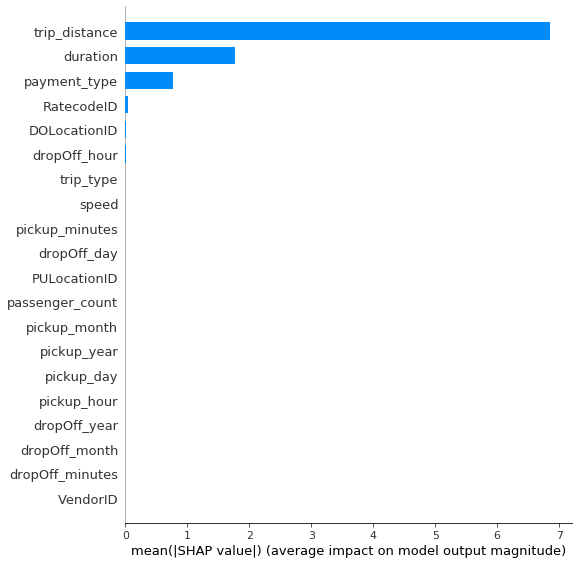

In [10]:
shap.summary_plot(shap_values, X, plot_type="bar")

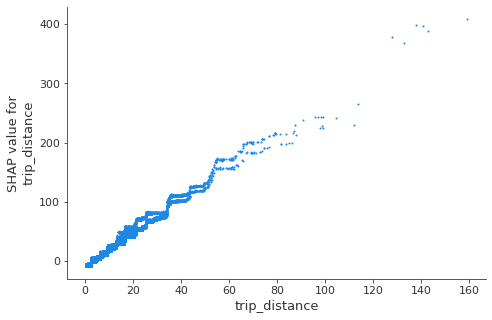

In [11]:
shap.dependence_plot("trip_distance", shap_values, X, interaction_index=None, dot_size=4)